# [Q1 10 points] Read in data
Read in the files gold.txt and labels.txt. The gold DataFrame should have columns url and category, while the labels DataFrame should have columns turk, url and category. You will have to pick the right separator.

In [1]:
import pandas as pd
df_gold=pd.read_csv('gold.txt', header = None)
df_labels=pd.read_csv('labels.txt', header = None)

df_gold=df_gold[0].str.split("\t", n = 1, expand = True)
df_gold.columns=["url","category"]
print df_gold[:5]

df_labels=df_labels[0].str.split("\t", n = 2, expand = True)
df_labels.columns=["turk","url","category"]
df_labels[:5]

                                      url category
0               http://0800-horoscope.com        G
1                      http://18games.net        X
2                    http://1pixelout.net        G
3  http://1porno.com/004/teens/index.html        X
4   http://1stpussy.com/005/16/index.html        X


,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G


# [Q2 10 points] Split into two DataFrames
Split the labels DataFrame into two: labels on gold and labels unknown,the former containing all rows where the url is present in the gold set, and the latter one contains all remaining rows of labels.

In [2]:
def url_check(url):
    return url in df_gold['url'].values
df_labels_gold=df_labels[df_labels['url'].map(url_check)==1]
df_labels_unknown=df_labels[df_labels['url'].map(url_check)!=1]
print df_labels_gold[:5]
print df_labels_unknown[:5]

               turk                        url category
245  A1253FXHCZ9CWM  http://0800-horoscope.com        G
246  A153PKAL7OAY36  http://0800-horoscope.com        G
247  A1FV9SAPL5C6KY  http://0800-horoscope.com        G
248  A1JTOT0DWM6QGL  http://0800-horoscope.com        G
249  A1PXXEOGQ76RNJ  http://0800-horoscope.com        G
             turk            url category
0  A1OT3A29R9N1DG  http://000.cc        P
1  A1PXXEOGQ76RNJ  http://000.cc        G
2  A1PXXEOGQ76RNJ  http://000.cc        G
3  A21US576U8SCO4  http://000.cc        G
4  A2LGX47NN7C5D3  http://000.cc        G


# [Q3 10 points] Compute accuracies of turks
Create a rater goodness DataFrame that is indexed by turk, and has two columns: the number of ratings, and the average correctness of ratings for each turk (both on gold set urls).

In [3]:
df_labels_merged=df_labels_gold.merge(df_gold, left_on='url', right_on='url',suffixes=('_turk', '_actual'))
df_labels_merged['Correctness']= df_labels_merged['category_turk']==df_labels_merged['category_actual']
df_labels_merged=df_labels_merged.rename(index=df_labels_merged['turk'])
#df_labels_merged[:5]
#print df_labels_merged.loc['A13OE9GBRJ0S2U']
Rater_Goodness=df_labels_merged.groupby('turk')['Correctness'].agg(['count','mean'])
Rater_Goodness

,count,mean
turk,,
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000
A12Y1GTGIQDGRA,3,0.333333
A13CEW9JGDWGX1,1,1.000000
A13OE9GBRJ0S2U,4,0.750000
A14IQ4GLNWNPOJ,1,1.000000
A153PKAL7OAY36,148,0.722973


# [Q4 10 points] Odds ratios
If someone is correct p fraction of the time, the odds of success are defined as:
odds = p/1.001 - p
Attach a column called odds to the rater goodness DataFrame, using the average correctness of the turk as his or her p.

In [4]:
def odds(p):
    odd=p/(1.001-p)
    return odd
Rater_Goodness['Odds']=Rater_Goodness['mean'].map(odds)
Rater_Goodness.iloc[:5]

,count,mean,Odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251


# [Q5 10 points] Most accurate turks
List the top 10 most accurate turks who have rated at least 20 gold set URLs.

In [5]:
mask=Rater_Goodness['count']>=20
Rater_Goodness[mask].sort_values(by='mean', ascending = False).iloc[:10]

,count,mean,Odds
turk,,,
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A32W20KGQXS0LL,25,0.800000,3.980100
A20PWAB7G3HDHU,20,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635


# [Q6 10 points] Rating counts versus accuracy
One may imagine that a committed and accurate turk will rate lots of URLs. On the other hand, perhaps it is only the spammers who have the time to rate lots of URLs.
Is number of ratings by a turker on gold set URLs related to his or her accuracy? There's no fixed answer; just try to show some evidence for your answer.

Populating the interactive namespace from numpy and matplotlib


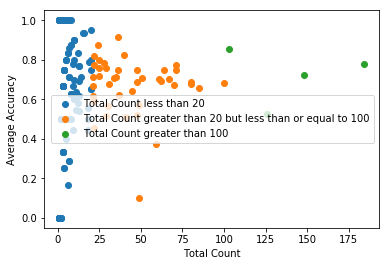

In [13]:
%pylab inline
tless20 = Rater_Goodness[Rater_Goodness['count'] <=20]
tmore20 = Rater_Goodness[(Rater_Goodness['count'] >20) & (Rater_Goodness['count']<=100)]
tmore100 = Rater_Goodness[Rater_Goodness['count'] >100]
plot(tless20['count'], tless20['mean'], marker='o', linestyle='None', label='Total Count less than 20')
plot(tmore20['count'], tmore20['mean'], marker='o', linestyle='None', label='Total Count greater than 20 but less than or equal to 100')
plot(tmore100['count'], tmore100['mean'], marker='o', linestyle='None', label='Total Count greater than 100')
xlabel('Total Count')
ylabel('Average Accuracy')
#set_xscale('log')
legend(numpoints=1, loc='best')
show()

# [Q7 13 points] Overall predicted odds
Consider each url u that is not in the gold set, and each category c. For the pair (u,c), calculate the product of odds of all turks who 
(a) rated url u as category c, and (b) have rated more gold set urls than 75% of all turks who rated at least one gold-set url.
For example, if you find that there are 269 turks who rated at least one gold-set url, you want to select only the turks who have rated more gold-set urls than 75% of these 269 turks. We can think of these as our "reliable" turks. Now, our belief that url u belongs to category c depends on how many "reliable" turks rated u as c; specifically, our belief is based on the product of their reliability scores (i.e., their odds).
We shall call such products of odds the overall odds henceforth.

In [14]:
mask1=Rater_Goodness['count']>=1
len(mask1)*0.25
Reliable_turks=Rater_Goodness[mask].sort_values(by='mean', ascending = False).iloc[:int(round(len(mask1)*0.25)+1)]
print Reliable_turks.iloc[:5]

df_labels_unknown['u,c'] = df_labels_unknown[['url', 'category']].apply(lambda x: ','.join(x), axis = 1)
print df_labels_unknown.iloc[:5]

def reliability_check(turk_id):
    return turk_id in Reliable_turks.index.values

df_labels_unknown_rel=df_labels_unknown[df_labels_unknown['turk'].map(reliability_check)==1]

df2=Reliable_turks.merge(df_labels_unknown_rel, left_on='turk', right_on='turk')
print df2.iloc[:5]
#df_labels_unknown=df_labels_unknown.rename(index=df_labels_unknown['u,c'])
#df_labels_unknown

def odd_product(s):
    return s.product()

df2.groupby(['u,c'])[['Odds']].agg([odd_product])

                count      mean       Odds
turk                                      
A2U0R4X38GUKZE     20  0.950000  18.627451
A22C0PJUBFJTI0     36  0.916667  10.869565
A23YQUBXZPKILZ     24  0.875000   6.944444
ATVALOQVDCMZW     103  0.854369   5.826657
A1HIXWH4OXT8S4     40  0.825000   4.687500


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


             turk            url category              u,c
0  A1OT3A29R9N1DG  http://000.cc        P  http://000.cc,P
1  A1PXXEOGQ76RNJ  http://000.cc        G  http://000.cc,G
2  A1PXXEOGQ76RNJ  http://000.cc        G  http://000.cc,G
3  A21US576U8SCO4  http://000.cc        G  http://000.cc,G
4  A2LGX47NN7C5D3  http://000.cc        G  http://000.cc,G
             turk  count  mean       Odds                        url category  \
0  A2U0R4X38GUKZE     20  0.95  18.627451             http://3333.ir        G   
1  A2U0R4X38GUKZE     20  0.95  18.627451          http://abc.go.com        G   
2  A2U0R4X38GUKZE     20  0.95  18.627451        http://abgender.com        P   
3  A2U0R4X38GUKZE     20  0.95  18.627451        http://abk-soft.com        G   
4  A2U0R4X38GUKZE     20  0.95  18.627451  http://absoluteagency.com        G   

                           u,c  
0             http://3333.ir,G  
1          http://abc.go.com,G  
2        http://abgender.com,P  
3        http://abk-soft.co

,Odds
,odd_product
"u,c",
"http://0-101.net,G",2.155963
"http://000.cc,G",1.460583
"http://0000.jp,G",2.779429
"http://000relationships.com,G",2.912430
"http://000relationships.com,P",1.851852
"http://000vitamins.com,G",2.710047
"http://000webhost.com,G",11.159502
"http://003my.com,G",4.912040


In [21]:
mask1=Rater_Goodness['count']>=1
len(mask1)*0.25
Reliable_turks=Rater_Goodness[mask].sort_values(by='mean', ascending = False).iloc[:int(round(len(mask1)*0.25)+1)]
print Reliable_turks.iloc[:5]

df_labels_unknown['u,c'] = df_labels_unknown[['url', 'category']].apply(lambda x: ','.join(x), axis = 1)

df2=Reliable_turks[['Odds']].merge(df_labels_unknown, left_index=True, right_on='turk')
print df2.iloc[:5]

#def odd_product(s):
 #   return s.product()

df2.groupby(['url','category'])[['Odds']].prod()

                count      mean       Odds
turk                                      
A2U0R4X38GUKZE     20  0.950000  18.627451
A22C0PJUBFJTI0     36  0.916667  10.869565
A23YQUBXZPKILZ     24  0.875000   6.944444
ATVALOQVDCMZW     103  0.854369   5.826657
A1HIXWH4OXT8S4     40  0.825000   4.687500
           Odds            turk                        url category  \
2041  18.627451  A2U0R4X38GUKZE             http://3333.ir        G   
4734  18.627451  A2U0R4X38GUKZE          http://abc.go.com        G   
4868  18.627451  A2U0R4X38GUKZE        http://abgender.com        P   
4899  18.627451  A2U0R4X38GUKZE        http://abk-soft.com        G   
5012  18.627451  A2U0R4X38GUKZE  http://absoluteagency.com        G   

                              u,c  
2041             http://3333.ir,G  
4734          http://abc.go.com,G  
4868        http://abgender.com,P  
4899        http://abk-soft.com,G  
5012  http://absoluteagency.com,G  


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Odds
url                                                category            
http://0-101.net                                   G           2.155963
http://000.cc                                      G           1.460583
http://0000.jp                                     G           2.779429
http://000relationships.com                        G           2.912430
                                                   P           1.851852
http://000vitamins.com                             G           2.710047
http://000webhost.com                              G          11.159502
http://003my.com                                   G           4.912040
http://007absolutehardcore.com/early_cumshots/i... P           3.346522
                                                   R          12.290450
                                                   X         293.252871
http://007swz.cn                                   G           1.393883
http://01768.com                                   G           1.393883
http://0198.cc                                     G           2.947446
http://01house.cn                                  G           3.874200
http://01net.com                                   G           2.463388
http://01yyy.com                                   G           3.874200
                                                   R           1.304682
http://020dna.com                                  G           5.054597
                                                   R           1.620746
http://020hp.net                                   G           2.463388
http://020shenghuo.com                             G           1.393883
http://021cd.com                                   G           2.419121
http://024haha.cn                                  G           1.460583
http://028114.com                                  G           1.854185
http://028town.com                                 G           3.626269
http://029bus.cn                                   G           1.097994
                                                   P           1.330229
http://029zp.com                                   G           1.047852
http://02et.cn                                     G           2.581266
...                                                                 ...
http://zoomerang.com                               G           6.271191
http://zoominfo.com                                G          50.648819
http://zoosk.com                                   G           1.818574
                                                   P           1.620746
http://zoower.com                                  G           6.796445
http://zooz.vn                                     G           2.726048
http://zoozle.org                                  G          24.302891
http://zorkabiz.ru                                 G           5.054597
http://zouri.jp                                    G           1.432532
http://zoznam.sk                                   G           2.652501
                                                   R           2.988048
http://zqt9.com                                    G           2.912430
http://zses.com                                    G           1.994018
http://zshare.net                                  G           1.735526
http://zshareblog.com                              G           1.097994
http://zsmhl.com                                   G           2.419121
                                                   P           1.620746
http://ztomy.com                                   G          16.420733
http://zucaiba.com                                 G           1.432532
http://zumin-ads.com                               G           2.779429
http://zune.net                                    G          20.209842
http://zvezdanews.ru                               G           5.831416
http://zwame.pt                                    G           5.403882
http://zwinky.com                  

# [Q8 13 points] Predicted categories
Create a DataFrame (called result 75, whose index is URLs not in the gold set, and with two columns called top category and top odds. The top category should be the category with the highest overall odds for that url, and the top odds should be the overall odds for that top category.
These are our predictions, and the confidence we have in them (higher overall odds implies greater condence). If you want, you can check to see if the predicted categories make sense.

In [11]:
#df3=df_labels_unknown.rename(index=df_labels_unknown['url'])
df4=df_labels_unknown.merge(Rater_Goodness, left_on='turk', right_on='turk')
df5=df4.rename(index=df4['category'])
print df5.iloc[:10]
def max_category(s):
    return s.idxmax()
def overall_odds(t):
    index=t.idxmax()
    sum=df5.loc[df5['category']==index,'Odds'].sum()
    return sum
result_75=df5.groupby(['url'])[['Odds']].agg([max_category,overall_odds])
result_75

             turk                             url category  \
P  A1OT3A29R9N1DG                   http://000.cc        P   
G  A1OT3A29R9N1DG          http://1centemails.com        G   
P  A1OT3A29R9N1DG                http://24hfx.com        P   
P  A1OT3A29R9N1DG                 http://265e.com        P   
G  A1OT3A29R9N1DG                 http://30gh.com        G   
P  A1OT3A29R9N1DG           http://4006826827.com        P   
G  A1OT3A29R9N1DG    http://500lovemakingtips.com        G   
G  A1OT3A29R9N1DG             http://67.220.92.18        G   
P  A1OT3A29R9N1DG                 http://78ic.com        P   
R  A1OT3A29R9N1DG  http://abbys-sexual-health.com        R   

                                u,c  count  mean      Odds  
P                   http://000.cc,P      8   0.5  0.998004  
G          http://1centemails.com,G      8   0.5  0.998004  
P                http://24hfx.com,P      8   0.5  0.998004  
P                 http://265e.com,P      8   0.5  0.998004  
G           

Odds              
                                                   max_category  overall_odds
url                                                                          
http://0-101.net                                              G  6.764674e+06
http://000.cc                                                 G  6.764674e+06
http://0000.jp                                                G  6.764674e+06
http://000relationships.com                                   G  6.764674e+06
http://000vitamins.com                                        G  6.764674e+06
http://000webhost.com                                         G  6.764674e+06
http://003my.com                                              G  6.764674e+06
http://007absolutehardcore.com/early_cumshots/i...            X  8.552659e+05
http://007swz.cn                                              G  6.764674e+06
http://01768.com                                              G  6.764674e+06
http://0198.cc                                                G  6.764674e+06
http://01house.cn                                             G  6.764674e+06
http://01net.com                                              G  6.764674e+06
http://01yyy.com                                              G  6.764674e+06
http://020dna.com                                             R  5.842009e+05
http://020hp.net                                              G  6.764674e+06
http://020shenghuo.com                                        G  6.764674e+06
http://021cd.com                                              G  6.764674e+06
http://024haha.cn                                             G  6.764674e+06
http://028114.com                                             G  6.764674e+06
http://028town.com                                            G  6.764674e+06
http://029bus.cn                                              P  1.506460e+06
http://029zp.com                                              G  6.764674e+06
http://02et.cn                                                G  6.764674e+06
http://02ks.com                                               G  6.764674e+06
http://03.ru                                                  G  6.764674e+06
http://031598.cn                                              G  6.764674e+06
http://0356edu.com                                            G  6.764674e+06
http://0371zk.com                                             G  6.764674e+06
http://051198.cn                                              G  6.764674e+06
...                                                         ...           ...
http://zonarupiah.com                                         G  6.764674e+06
http://zonealarm.com                                          G  6.764674e+06
http://zooass.com                                             G  6.764674e+06
http://zoodump.com                                            G  6.764674e+06
http://zoogy.co.il                                            G  6.764674e+06
http://zoomerang.com                                          G  6.764674e+06
http://zoominfo.com                                           G  6.764674e+06
http://zoosk.com                                              G  6.764674e+06
http://zoower.com                                             G  6.764674e+06
http://zooz.vn                                                G  6.764674e+06
http://zoozle.org                                             G  6.764674e+06
http://zorkabiz.ru                                            G  6.764674e+06
http://zouri.jp                                               G  6.764674e+06
http://zoznam.sk                                              P  1.506460e+06
http://zqt9.com                                               G  6.764674e+06
http://zses.com                                               G  6.764674e+06
http://zshare.net                                             G  6.764674e+06
http://zshareblog.com                                         X  8.552659e+05
htt

# [Q9 14 points] Predicted categories using more turks
Questions 7 and 8 above only considered the ratings of turks who had rated enough gold set URLs, so we were relatively more confident about their accuracies. What happens if we loosen this restriction?
Repeat the code of Q7 and Q8, but replacing 75% by 25% in the description of Q7 (i.e., we also consider turks who have far fewer gold set ratings). Call this result 25.
Now let's see how these two results compare. Create a DataFrame where both the index and the columns are the various categories, and the cells contain the number of urls with these as the top categories according to result 75 and result 25.
For example, the cell corresponding to the row category=R and the column category=G would be the number of URLs that were predicted to be R by result 75 but predicted to be G by result 25.
Where are the most errors?